# CNN

The spatial structure in an image is not well captured when flattening the image pixels to a vector.  

* Advantages of CNN
    * Fewer parameters in the model
    * Invariant to object distortions and orientations
    * Automatically learn the features and structures

* Convoluional Layer
    * Filters
    * Feature maps
* Pooling Layer - Downsizes the feature maps
* Fully connected Layer - Flattened feedword neural network

###  Setup

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Data Preparation

In [23]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
## Make sure images have shape (28, 28, 1)#
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
#print("x_train shape:", x_train.shape)
#print(x_train.shape[0], "train samples")
#print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout



model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(units=32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [25]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 32s 85ms/step - loss: 1.7995 - accuracy: 0.8081 - val_loss: 0.1465 - val_accuracy: 0.9578
Epoch 2/5
375/375 [==============================] - 28s 74ms/step - loss: 0.2556 - accuracy: 0.9259 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 3/5
375/375 [==============================] - 29s 78ms/step - loss: 0.1972 - accuracy: 0.9437 - val_loss: 0.0797 - val_accuracy: 0.9754
Epoch 4/5
375/375 [==============================] - 29s 77ms/step - loss: 0.1715 - accuracy: 0.9507 - val_loss: 0.0747 - val_accuracy: 0.9776
Epoch 5/5
375/375 [==============================] - 31s 83ms/step - loss: 0.1610 - accuracy: 0.9529 - val_loss: 0.0704 - val_accuracy: 0.9793


In [28]:
from matplotlib import pyplot as plt
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

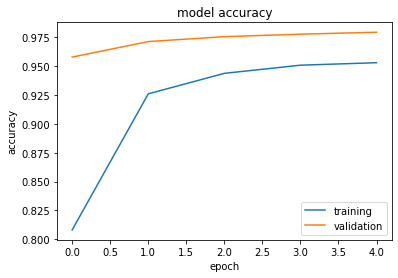

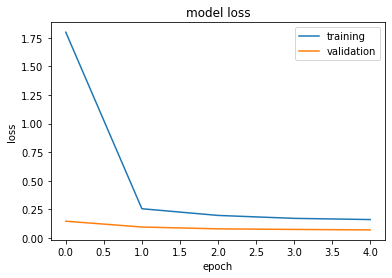

In [29]:
plot_acc_loss(history)

### Evaluate the model

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06993807107210159
Test accuracy: 0.9783999919891357


## Vision models

- You can build and train your model and do hyper parameter optimization
- Transfer learning. Take the existing pre-trained models and apply to your case. 

### We saw that CNN is good at capturing the structure and pattern in the dataset. Can we apply CNN to other domains like NLP? 